In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

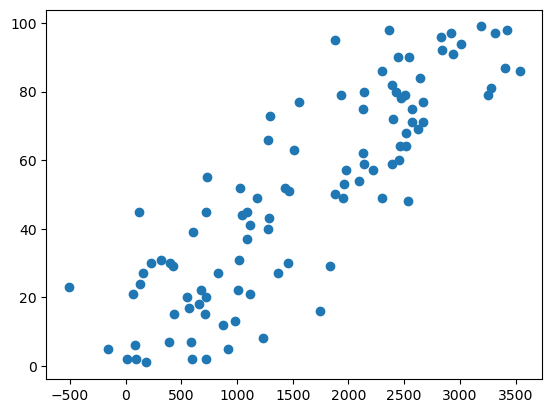

In [76]:
#Generate Data
rng = np.random.default_rng()
norm = scipy.stats.norm(loc=0, scale=500)
xs = rng.integers(1, 100, size=(10,10))
bias = 10
epsilon = norm.rvs((10,10))
ys = 30 * xs + epsilon

plt.scatter(ys, xs)
